# Ejercicio 4

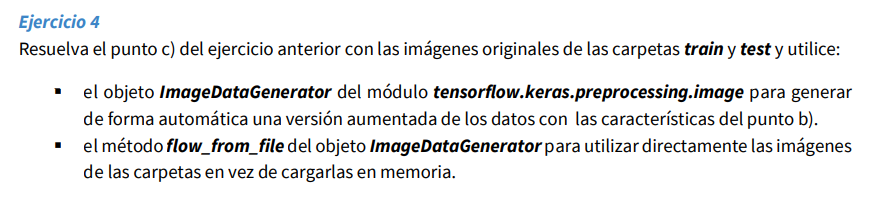

### Lectura de datos e importe de librerias

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.transform import rotate
import numpy as np
import glob
import matplotlib.pyplot as plt

### Construccion del modelo

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# constantes para arquitectura, generación datos y entrenamiento/validacion
EPOCAS = 30
LOTES  = 32
IMG_SIZE = (64, 64, 1)
N_CLASSES = 6
PACIENCIA = 10

In [4]:
#funcion que crea el modelo, pasandole la cantidad de clases y el tamanio de imagen
#CLASSES: nro de neuronas en la capa de salida de la red

def build_model(img_size, classes):
    model = Sequential()

    model.add(InputLayer(input_shape=img_size)) #capa de entrada
    model.add(Conv2D(8, kernel_size=(3,3), strides=(2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(classes, activation = 'softmax')) #capa de salida

    model.summary()
    return model


model = build_model(IMG_SIZE, N_CLASSES)
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

### Generador de Imagenes

In [7]:
# construye un generador de imagenes para dividir en entrenamiento y validación
# aplicando transformaciones para aumentar los datos
data_train_generator = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=45,         # rotacion
    # zoom_range=0.15,         # zoom
    # width_shift_range=0.1,   # desplazamiento horizontal
    # height_shift_range=0.1,  # desplazamiento vertical
    # shear_range=0.15,        #
    # horizontal_flip=False,   # espejo horizontal
    #vertical_flip=False,      # espejo vertical
    fill_mode="nearest"
    )

DATOS_DIR = "C:\\Users\\VICTUS\\Documents\\2024\\Deep_Learning_UNLP\\Datos\\fingers_by_label\\"
import os
# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_train_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=os.path.join(DATOS_DIR, 'train'),
            class_mode='categorical',
            batch_size=LOTES,
            color_mode='grayscale',
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_train_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
             directory=os.path.join(DATOS_DIR, 'train'),
            class_mode='categorical',
            batch_size=LOTES,
            color_mode='grayscale',
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )


data_test_generator = ImageDataGenerator(
    rotation_range=45,         # rotacion
    # zoom_range=0.15,         # zoom
    # width_shift_range=0.1,   # desplazamiento horizontal
    # height_shift_range=0.1,  # desplazamiento vertical
    # shear_range=0.15,        #
    # horizontal_flip=False,   # espejo horizontal
    #vertical_flip=False,      # espejo vertical
    fill_mode="nearest"
    )

test_iter = data_test_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
             directory=os.path.join(DATOS_DIR, 'test'),
            class_mode='categorical',
            color_mode='grayscale',
            batch_size=LOTES
            )





Found 14400 images belonging to 6 classes.
Found 3599 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.


In [8]:
# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss',
                           patience=PACIENCIA,
                           restore_best_weights=True)

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps= 10,
    epochs=EPOCAS,
    callbacks=[early_stop])


Epoch 1/30


c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 82s 176ms/step - accuracy: 0.3314 - loss: 1.7236 - val_accuracy: 0.5156 - val_loss: 1.2403
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5917 - loss: 1.1213 - val_accuracy: 0.6969 - val_loss: 0.8885
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6492 - loss: 0.8741 - val_accuracy: 0.6750 - val_loss: 0.7699
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6533 - loss: 0.7740 - val_accuracy: 0.7281 - val_loss: 0.6692
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7627 - loss: 0.6204 - val_accuracy: 0.8219 - val_loss: 0.4660
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8321 - loss: 0.4676 - val_accuracy: 0.8875 - val_loss: 0.3661
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9022 - loss: 0.3612 - val_accuracy: 0.9406 - val_loss: 0.2654
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9392 - loss: 0.2547 - val_accuracy: 0

c:\Users\VICTUS\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9727 - loss: 0.1156 - val_accuracy: 0.9656 - val_loss: 0.1517
Epoch 14/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9677 - loss: 0.1244 - val_accuracy: 0.9969 - val_loss: 0.0434
Epoch 15/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9759 - loss: 0.1017 - val_accuracy: 0.9719 - val_loss: 0.1046
Epoch 16/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9737 - loss: 0.1028 - val_accuracy: 0.9719 - val_loss: 0.1155
Epoch 17/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9756 - loss: 0.0949 - val_accuracy: 0.9812 - val_loss: 0.1076
Epoch 18/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9754 - loss: 0.0983 - val_accuracy: 0.9750 - val_loss: 0.1063
Epoch 19/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9812 - loss: 0.0846 - val_accuracy: 0.9781 - val_loss: 0.1073
Epoch 20/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9786 - loss: 0.0962 - val_accura


Efectividad del modelo con datos de entrenamiento:  98.67%
Efectividad del modelo con datos de Validación...:  98.89%
Efectividad del modelo con datos de Prueba.......:  98.97%


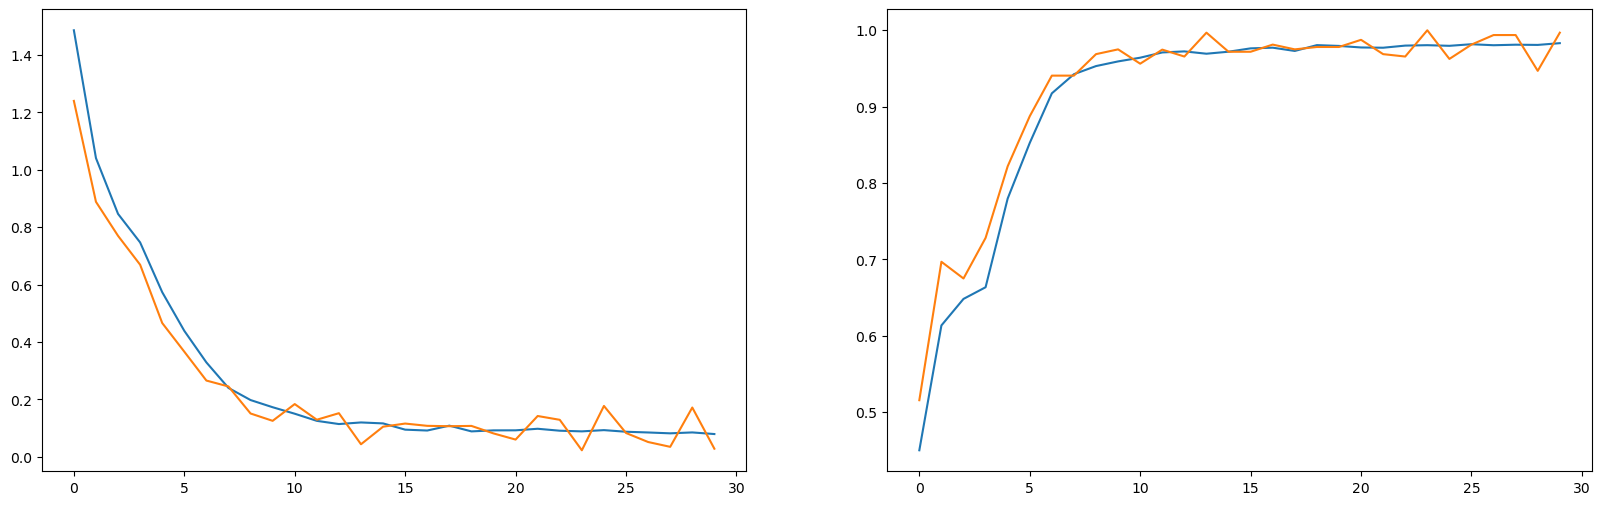

<Figure size 640x480 with 0 Axes>

In [9]:
# dibuja accuracy del progreso del entrenamiento
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")

# %% evalua el modelo para entrenamiento
pred = model.evaluate(train_iter, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(valid_iter, verbose=0)
print("Efectividad del modelo con datos de Validación...: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(test_iter, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))
